In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import preprocessing2
import cosine2
import plotly.express as px

from pdfstructure.hierarchy.parser import HierarchyParser
from pdfstructure.source import FileSource
from pdfstructure.printer import JsonFilePrinter
import pathlib
import json

In [3]:
def text_on_page(dict_var, id_json, list_res, page):
    if type(dict_var) is dict:
        for k, v in dict_var.items():
            if k == id_json and v == page:
                if v > page: return list_res
                list_res.append(dict_var["text"])
            elif isinstance(v, dict):
                text_on_page(v, id_json, list_res, page)   
            elif isinstance(v, list):
                for item in v:
                    text_on_page(item, id_json, list_res, page)
    return list_res

In [4]:
def get_page(data, page):
    lines = []
    for chunk in data["elements"]:
        lines.extend(text_on_page(chunk, "page", [], page))             
    return lines

In [5]:
def get_histogram(docs, top = 20):
    tokens = []
    for s in docs.values():
        tokens += s.split()
    uniques, counts = np.unique(tokens, return_counts = True)
    sorted_inds = np.argsort(counts)
    uniques_sorted = uniques[sorted_inds[-top:]][::-1]
    counts_sorted = counts[sorted_inds[-top:]][::-1]
    return (uniques_sorted, counts_sorted)

In [6]:
file = '/home/vince/Documents/Code/microgoogle/CS4300_microGoogle/pdfs/Nurse.pdf'
start = 1
end = 50

In [7]:
parser = HierarchyParser()
source = FileSource(file, page_numbers=list(range(start-1, end)))

In [8]:
# @st.cache(suppress_st_warning=True)
def fetch_doc(source):
    document = parser.parse_pdf(source)
    printer = JsonFilePrinter()
    file_path = pathlib.Path('pdf.json')
    printer.print(document, file_path=str(file_path.absolute()))
    with open('pdf.json') as json_file:
            data = json.load(json_file)
    pages = {i : get_page(data, i) for i in range(start-1, end)}
    return pages

In [9]:
json = fetch_doc(source)

In [10]:
json

{0: [],
 1: ['00doenges-FM  2/2/04  11:54 AM  Page ii',
  'GORDON’S FUNCTIONAL HEALTH',
  'PATTERNS THROUGH 2003*',
  '522–525',
  'HEALTH PERCEPTION-HEALTH MANAGEMENT PATTERN\nHealth maintenance, ineffective 275–278\nTherapeutic regimen: effective management 517–519\nTherapeutic regimen: ineffective management\nTherapeutic regimen: readiness for enhanced management 525–527\nTherapeutic regimen: family, ineffective management 520–522\nTherapeutic regimen: community, ineffective management\nNoncompliance (specify) 343–347\nHealth-seeking behaviors (specify) 278–281\nEnergy field, disturbed 208–211\nFalls, risk for\nInfection, risk for\nInjury (trauma), risk for 310–313\nProtection, ineffective 411–412\nPoisoning, risk for 393–396\nSuffocation, risk for 500–503\nPerioperative positioning injury, risk for 313–316\nSudden infant death syndrome 185–189',
  '307–310',
  '515–517',
  '217–221',
  '339–343',
  '304–306',
  '110–114',
  'NUTRITIONAL-METABOLIC PATTERN\nNutrition: more than body 

In [11]:
len(json)

50

In [12]:
tmp = [i for j in [i[1] for i in json.items()] for i in j]

In [13]:
word_window = 10

In [14]:
count_words = lambda doc: len(list(''.join(list(doc)).split()))

In [15]:
tmp= [i for i in list(enumerate(tmp)) if count_words(i[1])>word_window]

In [16]:
tmp

[(4,
  'HEALTH PERCEPTION-HEALTH MANAGEMENT PATTERN\nHealth maintenance, ineffective 275–278\nTherapeutic regimen: effective management 517–519\nTherapeutic regimen: ineffective management\nTherapeutic regimen: readiness for enhanced management 525–527\nTherapeutic regimen: family, ineffective management 520–522\nTherapeutic regimen: community, ineffective management\nNoncompliance (specify) 343–347\nHealth-seeking behaviors (specify) 278–281\nEnergy field, disturbed 208–211\nFalls, risk for\nInfection, risk for\nInjury (trauma), risk for 310–313\nProtection, ineffective 411–412\nPoisoning, risk for 393–396\nSuffocation, risk for 500–503\nPerioperative positioning injury, risk for 313–316\nSudden infant death syndrome 185–189'),
 (11,
  'NUTRITIONAL-METABOLIC PATTERN\nNutrition: more than body requirements, imbalanced 352–355\nNutrition: more than body requirements, risk for imbalanced 356–358\nNutrition: less than body requirements, imbalanced 347–352\nNutrition, readiness for enhance

In [17]:
import cosine3

In [18]:
tfidf_vectorizer = cosine3.get_tfidf_vectorizer()

In [19]:
import preprocessing3

In [20]:
import json as js

In [21]:
def fetch_pages(source):
    document = parser.parse_pdf(source)
    printer = JsonFilePrinter()
    file_path = pathlib.Path('pdf.json')
    printer.print(document, file_path=str(file_path.absolute()))

    with open('pdf.json') as json_file:
        data = js.load(json_file)
    json_file.close()
    pages = {i + 1 : get_page(data, i) for i in range(0, end)}
    return pages, file_path
pages, file_path = fetch_pages(source)

In [22]:
(formatted_docs, paragraph_page_idx) = preprocessing3.get_formatted_docs(pages)

In [23]:
preprocessed_docs = preprocessing3.get_preprocessed_docs(formatted_docs)

In [24]:
tfidf_matrix = tfidf_vectorizer.fit_transform(list(preprocessed_docs.values())).toarray()

In [25]:
np.shape(tfidf_matrix)

(964, 1605)

In [26]:
tmp = tfidf_matrix@tfidf_matrix.T

In [27]:
import matplotlib.pyplot as plt

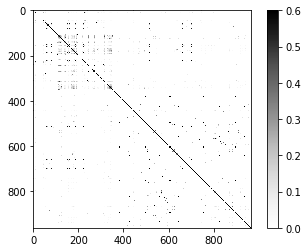

In [28]:
plt.imshow(tmp, interpolation='none',
           cmap=plt.cm.Greys, vmin=0, vmax=0.6)
plt.colorbar()

# plt.xticks(range(n_speakers_to_analyze), speakers_to_analyze, rotation=90)
# plt.yticks(range(n_speakers_to_analyze), speakers_to_analyze)
plt.show()

In [29]:
tmp.shape

(964, 964)

In [41]:
tmp1.shape

(964, 964)

In [31]:
tmp1 = np.tril(tmp)
indices = np.argwhere((tmp1 > .48) & (tmp < .58))

In [32]:
len(indices)

592

In [33]:
query = "blood pressure"

In [47]:
verbatim_search = lambda query: [msg for msg in tmp if query in msg]

In [48]:
len(verbatim_search('volume imbalgance'))

<ipython-input-47-eac202d75418>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  verbatim_search = lambda query: [msg for msg in tmp if query in msg]


0

In [49]:
tmp

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
tmp

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
tmp = [i for j in [i[1] for i in json.items()] for i in j]
tmp= [i for i in list(enumerate(tmp)) if count_words(i[1])>word_window]

In [54]:
text_blob = ' '.join([i[1] for i in tmp])

In [55]:
text_blob

'HEALTH PERCEPTION-HEALTH MANAGEMENT PATTERN\nHealth maintenance, ineffective 275–278\nTherapeutic regimen: effective management 517–519\nTherapeutic regimen: ineffective management\nTherapeutic regimen: readiness for enhanced management 525–527\nTherapeutic regimen: family, ineffective management 520–522\nTherapeutic regimen: community, ineffective management\nNoncompliance (specify) 343–347\nHealth-seeking behaviors (specify) 278–281\nEnergy field, disturbed 208–211\nFalls, risk for\nInfection, risk for\nInjury (trauma), risk for 310–313\nProtection, ineffective 411–412\nPoisoning, risk for 393–396\nSuffocation, risk for 500–503\nPerioperative positioning injury, risk for 313–316\nSudden infant death syndrome 185–189 NUTRITIONAL-METABOLIC PATTERN\nNutrition: more than body requirements, imbalanced 352–355\nNutrition: more than body requirements, risk for imbalanced 356–358\nNutrition: less than body requirements, imbalanced 347–352\nNutrition, readiness for enhanced 359–362\nBreastfe

[nltk_data] Downloading package webtext to /home/vince/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


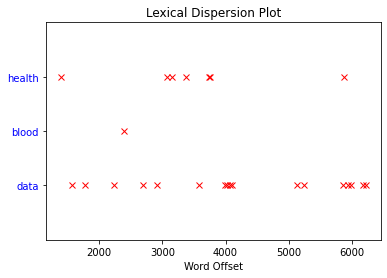

In [57]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
 
words = ['data', 'blood', 'health']
 
nltk.download('webtext')
with open('./text_blob.txt','w') as f:
    f.write(text_blob)
# wt_words = webtext.words('/home/vince/Documents/Code/microgoogle/CS4300_microGoogle/text_blob.txt')  # Sample data
#  
wt_words = text_blob.split()
points = [(x, y) for x in range(len(wt_words))
          for y in range(len(words)) if wt_words[x] == words[y]]
 
if points:
    x, y = zip(*points)
else:
    x = y = ()

plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()

In [58]:
import plotly.express as px

In [59]:
import pandas as pd

In [67]:
dispersion_df = pd.DataFrame(y,x)

In [76]:
px.scatter(dispersion_df, labels=["a","b"])
# px.a

In [82]:
y

(2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0)

In [88]:
words

['data', 'blood', 'health']

In [94]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x = x,
    y = y,
    mode="markers"
))

fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = list(range(max(y)+1)),
        ticktext = words
    )
)

fig.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

num_clusters = 10
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49'
}
pca_num_components = 2
tsne_num_components = 2

# # texts_list = some array of strings for which TF-IDF is being computed

# # calculate tf-idf of texts
# tf_idf_vectorizer = TfidfVectorizer(analyzer="word", use_idf=True, smooth_idf=True, ngram_range=(2, 3))
# tf_idf_matrix = tf_idf_vectorizer.fit_transform(texts_list)

# # create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)

labels = clustering_model.fit_predict(tfidf_matrix)
# print labels

X = tfidf_matrix#.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
# print reduced_data

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.text.tsne import tsne
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
corpus = load_hobbies()
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus.data)
y = corpus.target

tsne(X, y)

In [ ]:

from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf  = TfidfVectorizer()
with open('text_blob.txt') as raw:
    file = raw
    docs   = tfidf.fit_transform(file)

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(docs)
tsne.poof()

In [ ]:
text_blob.split()

In [98]:
word_list = text_blob.split()

In [ ]:
def find_ngrams(input_list, n):
    return zip(*(input_list[i:] for i in range(n)))

trigrams = find_ngrams(word_list, 2)

In [ ]:
list(trigrams)

In [96]:


from collections import Counter

bigrams = zip(list(text_blob), list(text_blob)[1:])
counts = Counter(bigrams)
print(counts.most_common())


[((' ', ' '), 1782), (('e', ' '), 937), (('i', 'n'), 866), (('s', ' '), 709), (('t', 'i'), 698), ((' ', 'a'), 641), (('r', 'e'), 638), (('o', 'n'), 627), ((' ', 't'), 616), (('t', 'h'), 614), (('d', ' '), 587), (('e', 'n'), 575), (('a', 'n'), 566), (('n', 't'), 552), (('e', 's'), 520), ((',', ' '), 510), (('h', 'e'), 509), (('o', 'r'), 485), (('e', 'd'), 474), (('a', 't'), 468), (('i', 'o'), 446), ((' ', 'i'), 444), (('n', ' '), 405), (('n', 'g'), 403), (('e', 'r'), 394), (('t', 'e'), 390), ((' ', 'o'), 381), (('i', 's'), 364), (('a', 'l'), 357), (('t', ' '), 347), (('s', 'e'), 347), ((' ', 'c'), 340), (('n', 'd'), 337), (('a', 'r'), 332), (('s', 'i'), 296), (('r', ' '), 289), (('d', 'i'), 283), (('m', 'e'), 278), ((' ', 'f'), 277), ((' ', 'p'), 274), (('i', 't'), 272), (('u', 'r'), 269), ((' ', 'd'), 265), (('d', 'e'), 262), (('r', 'i'), 261), (('o', 'f'), 260), (('g', ' '), 257), (('t', 'o'), 253), (('r', 'o'), 252), (('i', 'c'), 248), (('s', 's'), 246), (('l', 'i'), 246), (('c', 't'

In [ ]:
counts

In [ ]:
text_blob

In [ ]:
g = ['1','2','3',' ','a','b']

In [ ]:
(''.join(g)).split()

In [99]:
word_list

['HEALTH',
 'PERCEPTION-HEALTH',
 'MANAGEMENT',
 'PATTERN',
 'Health',
 'maintenance,',
 'ineffective',
 '275–278',
 'Therapeutic',
 'regimen:',
 'effective',
 'management',
 '517–519',
 'Therapeutic',
 'regimen:',
 'ineffective',
 'management',
 'Therapeutic',
 'regimen:',
 'readiness',
 'for',
 'enhanced',
 'management',
 '525–527',
 'Therapeutic',
 'regimen:',
 'family,',
 'ineffective',
 'management',
 '520–522',
 'Therapeutic',
 'regimen:',
 'community,',
 'ineffective',
 'management',
 'Noncompliance',
 '(specify)',
 '343–347',
 'Health-seeking',
 'behaviors',
 '(specify)',
 '278–281',
 'Energy',
 'field,',
 'disturbed',
 '208–211',
 'Falls,',
 'risk',
 'for',
 'Infection,',
 'risk',
 'for',
 'Injury',
 '(trauma),',
 'risk',
 'for',
 '310–313',
 'Protection,',
 'ineffective',
 '411–412',
 'Poisoning,',
 'risk',
 'for',
 '393–396',
 'Suffocation,',
 'risk',
 'for',
 '500–503',
 'Perioperative',
 'positioning',
 'injury,',
 'risk',
 'for',
 '313–316',
 'Sudden',
 'infant',
 'death'

In [100]:
bigrams = zip(word_list, word_list[1:])
counts = Counter(bigrams)

[(('risk', 'for'), 69), (('of', 'the'), 42), (('readiness', 'for'), 28), (('for', 'enhanced'), 28), (('of', 'care'), 26), (('I', 'N'), 25), (('N', 'U'), 23), (('U', 'R'), 23), (('R', 'S'), 23), (('O', 'C'), 23), (('S', 'E'), 21), (('E', 'T'), 21), (('the', 'nurse'), 20), (('T', 'I'), 20), (('to', 'the'), 19), (('in', 'the'), 19), (('T', 'H'), 18), (('H', 'E'), 18), (('E', '’'), 18), (('’', 'S'), 18), (('S', 'P'), 18), (('P', 'O'), 18), (('C', 'K'), 18), (('K', 'E'), 18), (('T', 'G'), 18), (('G', 'U'), 18), (('U', 'I'), 18), (('I', 'D'), 18), (('D', 'E'), 18), (('with', 'the'), 17), (('the', 'client'), 15), (('N', 'G'), 15), (('P', 'R'), 15), (('C', 'E'), 15), (('the', 'nursing'), 14), (('plan', 'of'), 14), (('I', 'C'), 14), (('of', 'nursing'), 13), (('T', 'O'), 13), (('by', 'the'), 11), (('nursing', 'diagnoses'), 10), (('can', 'be'), 10), (('nursing', 'diagnosis'), 10), (('the', 'client’s'), 10), (('P', 'U'), 10), (('U', 'T'), 10), (('T', 'T'), 10), (('G', 'T'), 10), (('E', 'O'), 10), 

In [108]:
list(np.vstack(counts.most_common())[:,1])

[69,
 42,
 28,
 28,
 26,
 25,
 23,
 23,
 23,
 23,
 21,
 21,
 20,
 20,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 13,
 13,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,